In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
car=pd.read_csv("car data.csv")

In [3]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car.shape

(301, 9)

In [5]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
car['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [9]:
car['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [10]:
car['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [11]:
car.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)

In [12]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0


In [13]:
from sklearn.preprocessing import LabelEncoder
ec=LabelEncoder()
car['Seller_Type']=ec.fit_transform(car['Seller_Type'])
car['Transmission']=ec.fit_transform(car['Transmission'])

In [14]:
X=car.drop(['Selling_Price','Car_Name'],axis=1)
y=car['Selling_Price']

In [15]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,0,0,1,0
3,2011,4.15,5200,0,0,1,0
4,2014,6.87,42450,1,0,1,0


In [16]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2)

In [18]:
X.shape

(301, 7)

In [19]:
X_train.shape

(270, 7)

In [20]:
X_test.shape

(31, 7)

In [21]:
lr=LinearRegression()
lr.fit(X_train,y_train)
X_train_prediction=lr.predict(X_train)
score_1=metrics.r2_score(y_train,X_train_prediction)
print(score_1)

0.8799451660493706


In [22]:
score_2=metrics.mean_absolute_error(y_train,X_train_prediction)
print(score_2)

1.2166174093912077


In [23]:
X_test_prediction=lr.predict(X_test)
score_3=metrics.r2_score(y_test,X_test_prediction)
print(score_3)

0.8365766715026872


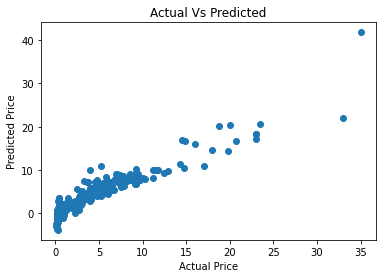

In [24]:
plt.scatter(y_train,X_train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Vs Predicted")
plt.show()

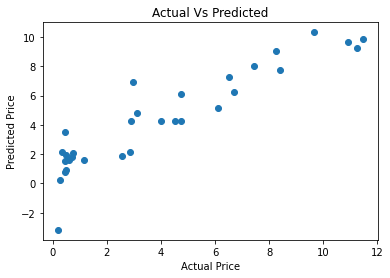

In [25]:
plt.scatter(y_test,X_test_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Vs Predicted")
plt.show()

0.8427856123435794
1.2863097696916528
0.8709167941173195


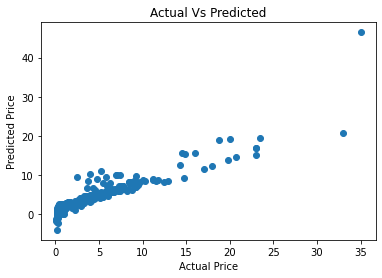

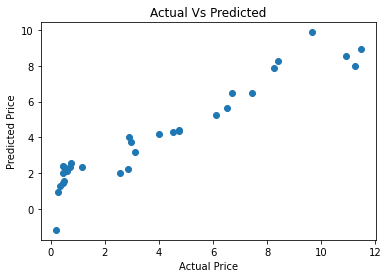

In [26]:
ls=Lasso()
ls.fit(X_train,y_train)
X_train_prediction=ls.predict(X_train)
score_1=metrics.r2_score(y_train,X_train_prediction)
print(score_1)

score_2=metrics.mean_absolute_error(y_train,X_train_prediction)
print(score_2)

X_test_prediction=ls.predict(X_test)
score_3=metrics.r2_score(y_test,X_test_prediction)
print(score_3)

plt.scatter(y_train,X_train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Vs Predicted")
plt.show()

plt.scatter(y_test,X_test_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Vs Predicted")
plt.show()